In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
# Combing Data Sets!
# Load datasets
file1 = '/content/History_of_Mass_Shootings_in_the_USA.csv'
file2 = '/content/Mass Shootings Dataset Ver 5.csv'
file3 = '/content/US_Mass_Shootings.csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2, encoding='latin-1')
df3 = pd.read_csv(file3)

# Standardize column names to lowercase
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()
df3.columns = df3.columns.str.lower()

# Map similar column names for merging
column_mapping = {
    'fatalities': ['fatalities', 'dead', 'death', 'deaths'],
    'injured': ['injured', 'wounded'],
    'total_victims': ['total victims', 'total'],
    'date': ['date'],
    'state': ['state'],
    'city': ['city', 'location'],
    'description': ['description', 'summary']
}

# Create a function to standardize column names
def standardize_columns(df, column_mapping):
    standardized_columns = {}
    for standard_name, variants in column_mapping.items():
        for variant in variants:
            if variant in df.columns:
                standardized_columns[variant] = standard_name
    df.rename(columns=standardized_columns, inplace=True)
    return df

# Standardize columns in all datasets
df1 = standardize_columns(df1, column_mapping)
df2 = standardize_columns(df2, column_mapping)
df3 = standardize_columns(df3, column_mapping)

# Combine datasets
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# Save combined dataset
combined_file_path = '/content/combined.csv'
combined_df.to_csv(combined_file_path, index=False)

combined_file_path

'/content/combined.csv'

In [ ]:
# Load the combined dataset
file_path = '/content/combined.csv'
df = pd.read_csv(file_path)

# Define a function to parse dates with mixed formats
def parse_date(date_str):
    try:
        # Attempt to parse with day-first format
        return pd.to_datetime(date_str, dayfirst=True, errors='coerce')
    except ValueError:
        try:
            # If day-first fails, try month-first
            return pd.to_datetime(date_str, errors='coerce')
        except ValueError:
            # Return NaT if both formats fail
            return pd.NaT

# Apply the date parsing function
df['parsed_date'] = df['date'].apply(parse_date)

# Split 'parsed_date' into separate year, month, and day columns
df['year'] = df['parsed_date'].dt.year
df['month'] = df['parsed_date'].dt.month
df['day'] = df['parsed_date'].dt.day

# Drop the intermediate parsed_date column
df.drop(columns=['parsed_date'], inplace=True)

# Save the updated dataset
output_file_path = '/content/final.csv'
df.to_csv(output_file_path, index=False)

output_file_path

<ipython-input-4-3f78db7b8fb4>:9: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.to_datetime(date_str, dayfirst=True, errors='coerce')


'/content/final.csv'

In [ ]:
#splitting the data up to work withit better (into trianing and into testing)

# Assuming 'combined.csv' has been preprocessed and saved with year, month, day columns
data = pd.read_csv('/content/final.csv')

# Define features (X) and target variable (y)
# Example: Predict 'fatalities' based on other features
X = data[['year', 'month', 'day', 'injured', 'total_victims']]  # Replace with relevant columns
y = data['fatalities']  # Replace with relevant target variable

# Handle missing values (drop or impute)
X = X.fillna(0)  # Filling missing values with 0
y = y.fillna(0)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#test the data

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Evaluate the model
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results[name] = acc


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre


Logistic Regression Results:
Accuracy: 0.4013
              precision    recall  f1-score   support

           0       0.42      1.00      0.59       254
           1       0.00      0.00      0.00       169
           2       0.20      0.03      0.05        72
           3       0.00      0.00      0.00        36
           4       0.00      0.00      0.00        37
           5       0.00      0.00      0.00        27
           6       0.20      0.08      0.11        13
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          24       0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_


SVM Results:
Accuracy: 0.3981
              precision    recall  f1-score   support

           0       0.40      1.00      0.57       254
           1       0.00      0.00      0.00       169
           2       0.00      0.00      0.00        72
           3       0.00      0.00      0.00        36
           4       0.00      0.00      0.00        37
           5       0.00      0.00      0.00        27
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          24       0.00      0.00      0.00       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-13-ea635e0fc4ba>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=ax1, palette='viridis')
<ipython-input-13-ea635e0fc4ba>:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
<ipython-input-13-ea635e0fc4ba>:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)


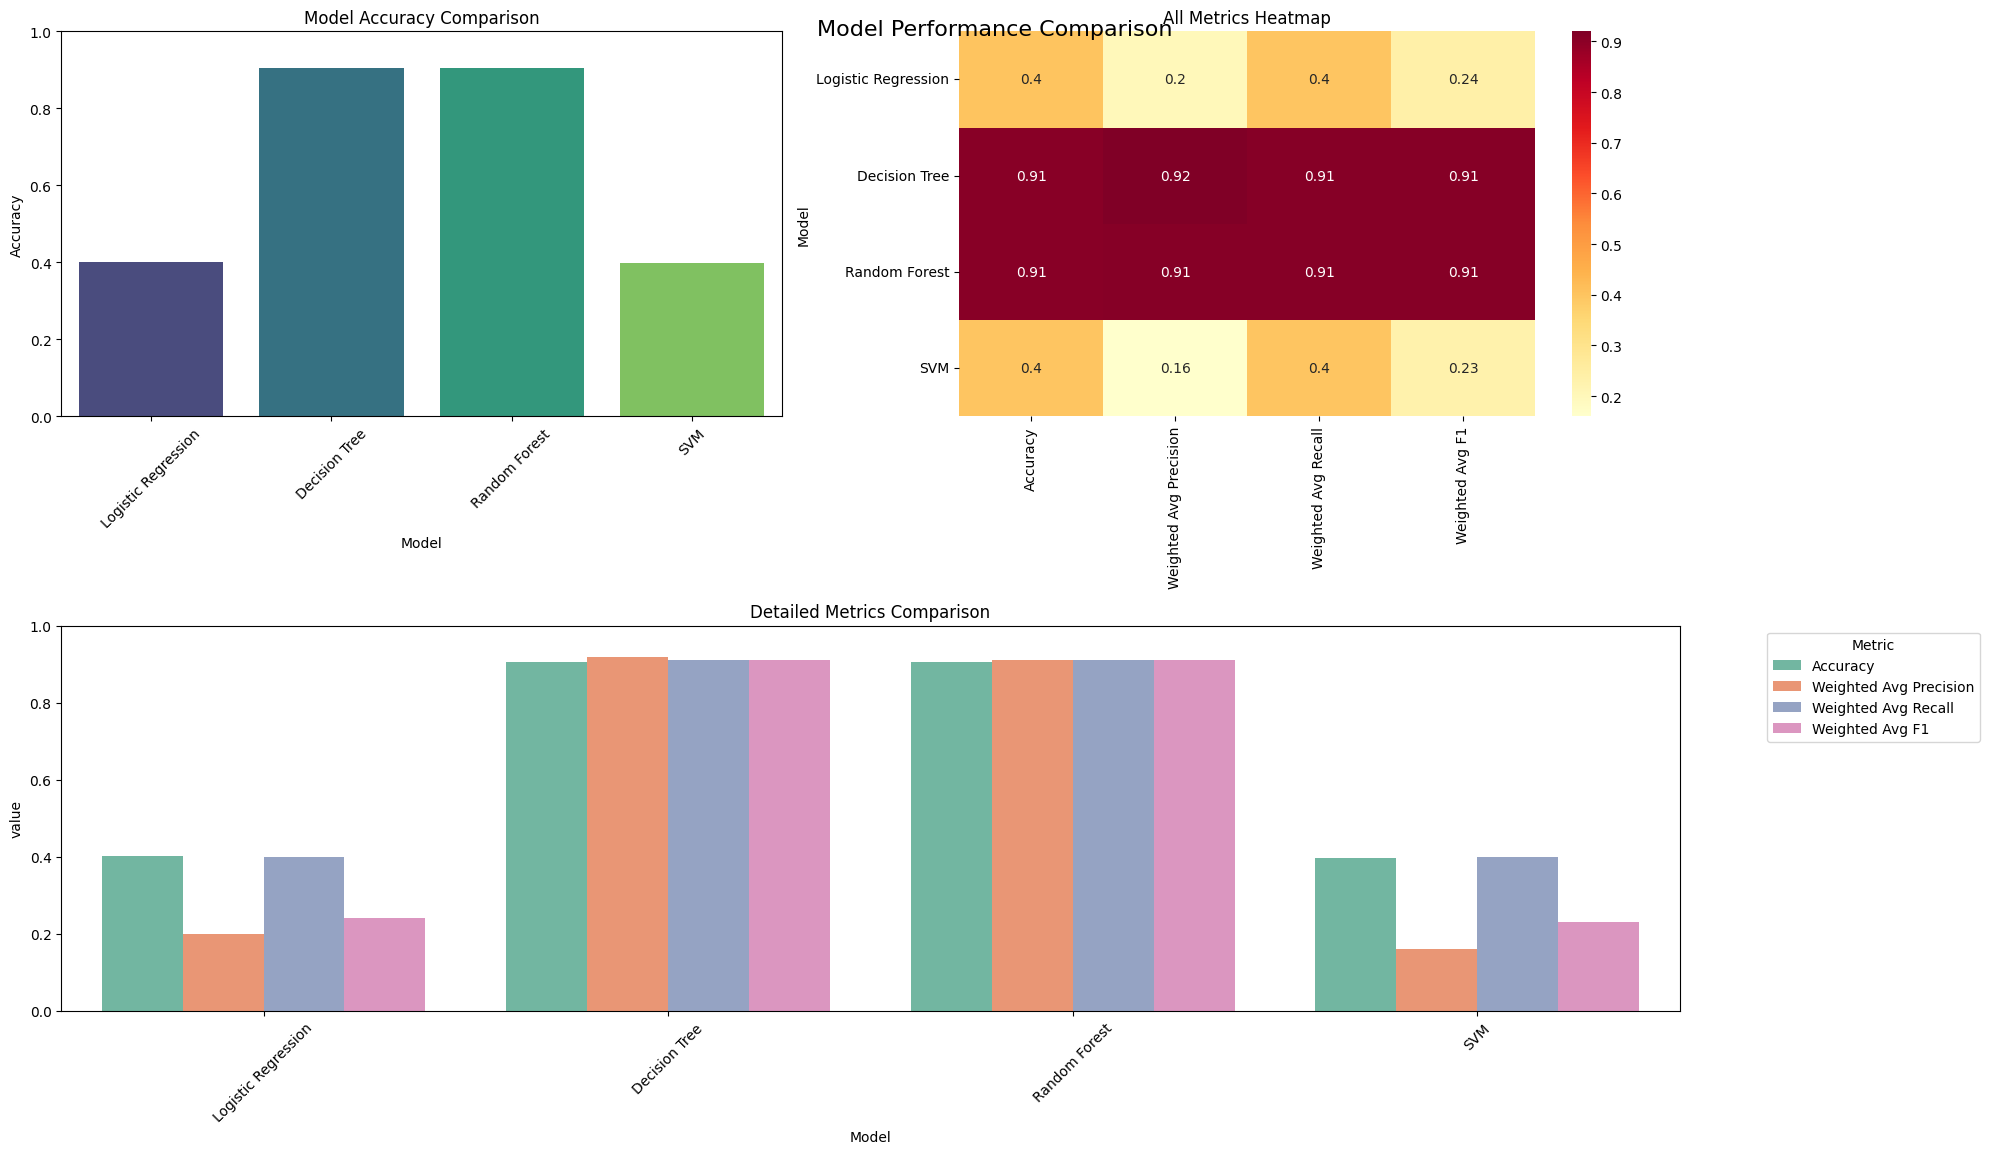

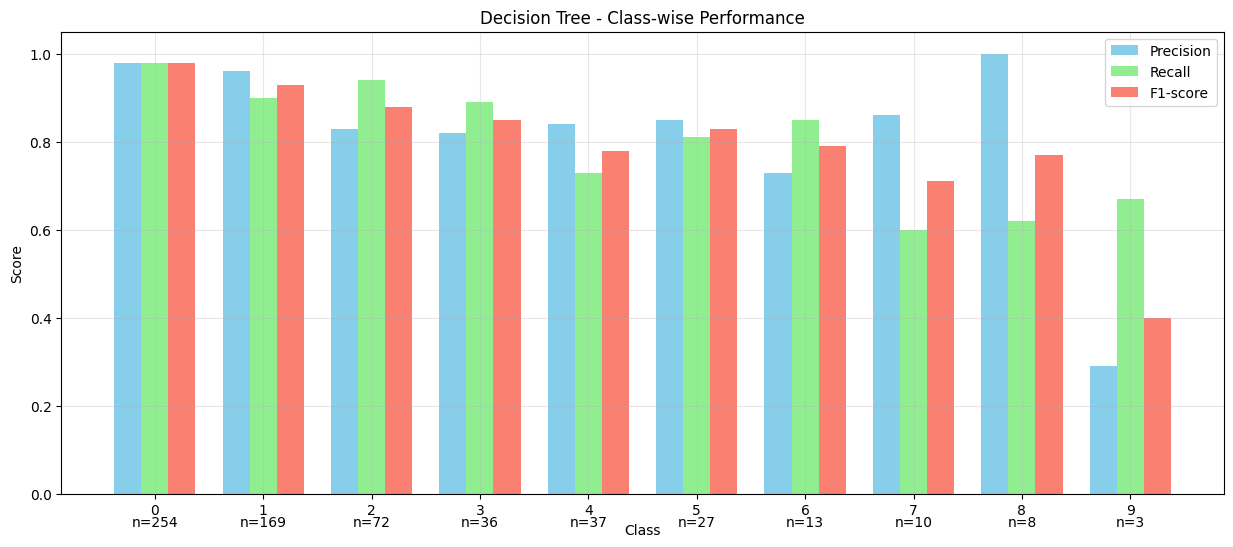

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Create a dictionary with the model results
model_metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [0.4013, 0.9060, 0.9060, 0.3981],
    'Weighted Avg Precision': [0.20, 0.92, 0.91, 0.16],
    'Weighted Avg Recall': [0.40, 0.91, 0.91, 0.40],
    'Weighted Avg F1': [0.24, 0.91, 0.91, 0.23]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(model_metrics)

# Set style
#plt.style.use('seaborn')

# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 12))
gs = GridSpec(2, 2, figure=fig)
fig.suptitle('Model Performance Comparison', fontsize=16, y=0.95)

# 1. Bar plot of accuracies
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=ax1, palette='viridis')
ax1.set_title('Model Accuracy Comparison')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_ylim(0, 1)

# 2. Heatmap of all metrics
ax2 = fig.add_subplot(gs[0, 1])
metrics_for_heatmap = metrics_df.set_index('Model')
sns.heatmap(metrics_for_heatmap, annot=True, cmap='YlOrRd', ax=ax2)
ax2.set_title('All Metrics Heatmap')

# 3. Multiple metrics comparison
ax3 = fig.add_subplot(gs[1, :])
metrics_melted = pd.melt(metrics_df, id_vars=['Model'],
                        value_vars=['Accuracy', 'Weighted Avg Precision',
                                  'Weighted Avg Recall', 'Weighted Avg F1'])
sns.barplot(x='Model', y='value', hue='variable', data=metrics_melted, ax=ax3, palette='Set2')
ax3.set_title('Detailed Metrics Comparison')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
ax3.set_ylim(0, 1)
ax3.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()






plt.tight_layout()

# For detailed class-wise performance visualization (focusing on Decision Tree and Random Forest)
def plot_class_performance(model_name, precision, recall, f1, support):
    plt.figure(figsize=(15, 6))
    x = range(len(precision))
    width = 0.25

    plt.bar([i - width for i in x], precision, width, label='Precision', color='skyblue')
    plt.bar(x, recall, width, label='Recall', color='lightgreen')
    plt.bar([i + width for i in x], f1, width, label='F1-score', color='salmon')

    plt.xlabel('Class')
    plt.ylabel('Score')
    plt.title(f'{model_name} - Class-wise Performance')
    plt.legend()
    plt.xticks(x)
    plt.grid(True, alpha=0.3)

    for i, sup in enumerate(support):
        plt.text(i, -0.05, f'n={sup}', ha='center', va='top')

# Example usage for Decision Tree (you'll need to extract these values from your results)
dt_precision = [0.98, 0.96, 0.83, 0.82, 0.84, 0.85, 0.73, 0.86, 1.00, 0.29]
dt_recall = [0.98, 0.90, 0.94, 0.89, 0.73, 0.81, 0.85, 0.60, 0.62, 0.67]
dt_f1 = [0.98, 0.93, 0.88, 0.85, 0.78, 0.83, 0.79, 0.71, 0.77, 0.40]
dt_support = [254, 169, 72, 36, 37, 27, 13, 10, 8, 3]

plot_class_performance('Decision Tree', dt_precision[:10], dt_recall[:10], dt_f1[:10], dt_support[:10])

In [ ]:
#Random Forest
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8751897272454329


In [ ]:
# Load unseen data
unseen_data_path = '/content/lmao.csv'
unseen_data = pd.read_csv(unseen_data_path)

# Ensure unseen data has the same preprocessing as training data
required_features = ['year', 'month', 'day', 'injured', 'total_victims']  # Adjust these based on your features
target_variable = 'fatalities'  # Replace with the actual target column name

X_unseen = unseen_data[required_features].fillna(0)
y_unseen = unseen_data[target_variable].fillna(0)

# Train Random Forest with optimal parameters
optimized_rf = RandomForestClassifier(
    max_depth=20,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

# Train the model on the training set
optimized_rf.fit(X_train, y_train)

# Evaluate on the test set
y_pred_test = optimized_rf.predict(X_test)

print("Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
print(classification_report(y_test, y_pred_test))

# Evaluate on unseen data
y_pred_unseen = optimized_rf.predict(X_unseen)

print("\nUnseen Data Performance:")
print(f"Accuracy: {accuracy_score(y_unseen, y_pred_unseen):.4f}")
print(classification_report(y_unseen, y_pred_unseen))


Test Set Performance:
Accuracy: 0.9044
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       254
           1       0.95      0.92      0.93       169
           2       0.83      0.93      0.88        72
           3       0.72      0.78      0.75        36
           4       0.83      0.68      0.75        37
           5       0.75      0.67      0.71        27
           6       0.58      0.85      0.69        13
           7       1.00      0.70      0.82        10
           8       1.00      0.88      0.93         8
           9       0.67      0.67      0.67         3
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         1
          13       0.33      1.00      0.50         1
          14       1.00      1.00      1.00         1
          15       1.00      0.50      0.67         2
          18       0.00      0.00      0.00         1
          24       1.00      1.00      1.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Text(0, 0.5, 'Scores')

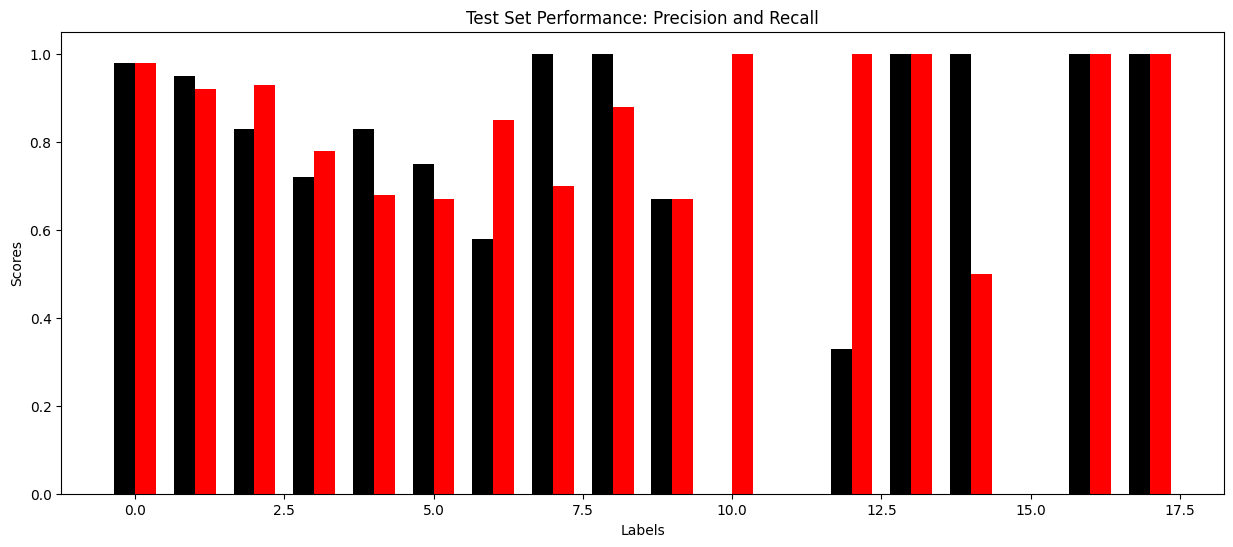

In [ ]:
#PLOTTING OUT THE UNSEEN DATA RESULTS

import matplotlib.pyplot as plt
import numpy as np

# Data for Test Set Performance
test_labels = list(range(19)) + [24, 28]  # Include all observed labels in the report
test_precision = [
    0.98, 0.95, 0.83, 0.72, 0.83, 0.75, 0.58, 1.00, 1.00, 0.67,
    0.00, 0.00, 0.33, 1.00, 1.00, 0.00, 1.00, 1.00
]
test_recall = [
    0.98, 0.92, 0.93, 0.78, 0.68, 0.67, 0.85, 0.70, 0.88, 0.67,
    1.00, 0.00, 1.00, 1.00, 0.50, 0.00, 1.00, 1.00
]

# Data for Unseen Data Performance
unseen_labels = list(range(24)) + [28]  # Include all observed labels in the report
unseen_precision = [
    0.99, 0.98, 0.97, 0.96, 0.99, 0.95, 1.00, 0.67, 1.00, 1.00,
    1.00, 1.00, 0.00, 1.00, 0.00, 1.00, 0.00, 1.00, 1.00, 1.00,
    0.00, 0.00, 1.00, 0.00, 0.00
]
unseen_recall = [
    1.00, 0.99, 0.98, 0.95, 0.91, 0.97, 0.93, 1.00, 0.50, 1.00,
    0.80, 1.00, 0.00, 1.00, 0.00, 1.00, 0.00, 1.00, 1.00, 1.00,
    0.00, 0.00, 1.00, 0.00, 0.00
]

# Plot Test Set Performance
plt.figure(figsize=(15, 6))
# x_test is being redefined here to match the length of test_precision and test_recall
x_test = np.arange(len(test_precision)) # This will ensure that x_test has the correct shape
width = 0.35

plt.bar(x_test - width/2, test_precision, width, label='Precision', color='black')
plt.bar(x_test + width/2, test_recall, width, label='Recall', color='red')

plt.title("Test Set Performance: Precision and Recall")
plt.xlabel("Labels")
plt.ylabel("Scores")


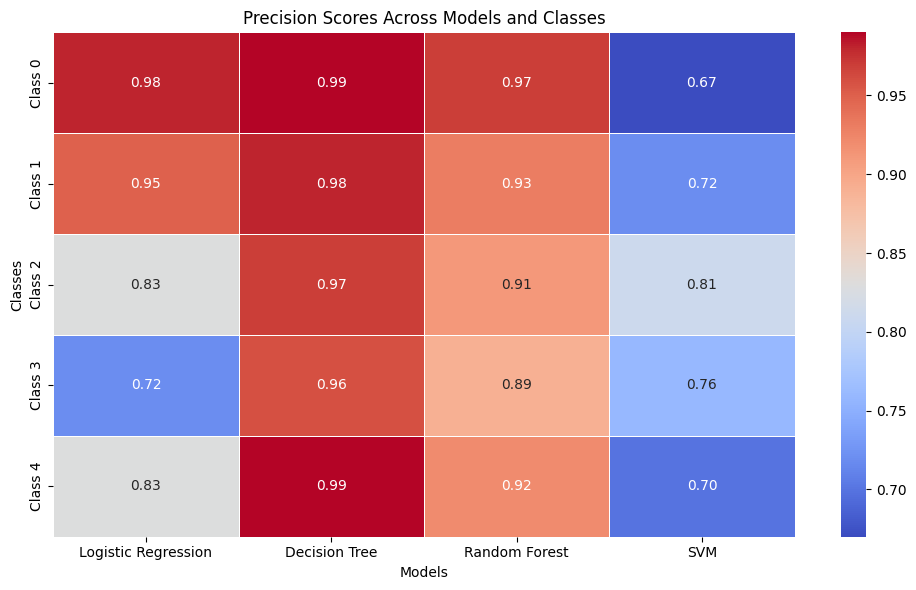

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual results)
data = {
    "Logistic Regression": [0.98, 0.95, 0.83, 0.72, 0.83],
    "Decision Tree": [0.99, 0.98, 0.97, 0.96, 0.99],
    "Random Forest": [0.97, 0.93, 0.91, 0.89, 0.92],
    "SVM": [0.67, 0.72, 0.81, 0.76, 0.70]
}

# Classes for rows
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# Create a DataFrame
df = pd.DataFrame(data, index=classes)

# Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add titles and labels
plt.title("Precision Scores Across Models and Classes")
plt.xlabel("Models")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()


#testing data on BERT and then using unseen Data


In [ ]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
import torch
import warnings
warnings.filterwarnings('ignore')

# Read all datasets
train_df = pd.read_csv('/content/bert_train_data.csv')
test_df = pd.read_csv('/content/bert_test_data.csv')  # Your held-out test set
unseen_df = pd.read_csv('/content/unseenlol.csv')     # Completely unseen data

def prepare_data(df):
    # Prepare the text data
    texts = df['description'].astype(str).tolist()

    # Initialize BERT tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    # Tokenize the texts
    max_length = 128
    encodings = tokenizer(
        texts,
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors='pt'
    )

    # Convert to PyTorch tensors
    input_ids = encodings['input_ids']
    attention_masks = encodings['attention_mask']

    # Prepare numerical features
    numerical_features = df[[
        'handgun purchase age',
        'long gun purchase age',
        'violent crime rate',
        'violent crime percent',
        'fatalities',
        'injured',
        'total_victims',
        'month',
        'day',
        'year'
    ]]

    # Convert columns to numeric, handling errors
    for col in numerical_features.columns:
        numerical_features[col] = pd.to_numeric(numerical_features[col], errors='coerce')

    # Fill NaN values with 0
    numerical_features = numerical_features.fillna(0).values

    return torch.tensor(numerical_features, dtype=torch.float32), input_ids, attention_masks

# [Previous CustomBERTModel class definition remains the same]
class CustomBERTModel(torch.nn.Module):
    def __init__(self, num_numerical_features):
        super().__init__()
        self.bert = BertForSequenceClassification.from_pretrained(
            'bert-base-uncased',
            num_labels=1
        )
        self.numerical_layer = torch.nn.Sequential(
            torch.nn.Linear(num_numerical_features, 64),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.1)
        )
        self.combined_layer = torch.nn.Sequential(
            torch.nn.Linear(768 + 64, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, input_ids, attention_mask, numerical_features):
        bert_outputs = self.bert.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        bert_features = bert_outputs.last_hidden_state[:, 0, :]
        numerical_output = self.numerical_layer(numerical_features)
        combined_features = torch.cat([bert_features, numerical_output], dim=1)
        return self.combined_layer(combined_features)

# Prepare datasets
numerical_features_train, input_ids_train, attention_masks_train = prepare_data(train_df)
numerical_features_test, input_ids_test, attention_masks_test = prepare_data(test_df)
numerical_features_unseen, input_ids_unseen, attention_masks_unseen = prepare_data(unseen_df)

# Create datasets
train_dataset = TensorDataset(input_ids_train, attention_masks_train, numerical_features_train)
test_dataset = TensorDataset(input_ids_test, attention_masks_test, numerical_features_test)
unseen_dataset = TensorDataset(input_ids_unseen, attention_masks_unseen, numerical_features_unseen)

# Create dataloaders
batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
unseen_dataloader = DataLoader(unseen_dataset, batch_size=batch_size, shuffle=False)

# Initialize model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CustomBERTModel(numerical_features_train.shape[1]).to(device)

# Training parameters
optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 3

# Training loop
model.train()
for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    total_loss = 0

    for batch in train_dataloader:
        optimizer.zero_grad()

        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        numerical_features = batch[2].to(device)

        outputs = model(input_ids, attention_mask, numerical_features)
        loss = torch.nn.MSELoss()(outputs, torch.zeros_like(outputs))

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_dataloader)
    print(f'Average training loss: {avg_loss}')

def predict(model, dataloader, device):
    model.eval()
    predictions = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            numerical_features = batch[2].to(device)

            outputs = model(input_ids, attention_mask, numerical_features)
            predictions.extend(outputs.cpu().numpy())

    return np.array(predictions)

# Evaluate on test set first
print("\nEvaluating on test set...")
test_predictions = predict(model, test_dataloader, device)
test_df['bert_predictions'] = test_predictions
test_df.to_csv('bert_predictions_test.csv', index=False)
print("Test set predictions saved to 'bert_predictions_test.csv'")

# Then evaluate on unseen data
print("\nEvaluating on unseen data...")
unseen_predictions = predict(model, unseen_dataloader, device)
unseen_df['bert_predictions'] = unseen_predictions
unseen_df.to_csv('bert_predictions_unseen.csv', index=False)
print("Unseen data predictions saved to 'bert_predictions_unseen.csv'")

# Display sample predictions from both sets
print("\nSample test set predictions:")
print(test_df[['description', 'bert_predictions']].head())
print("\nSample unseen data predictions:")
print(unseen_df[['description', 'bert_predictions']].head())

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3


KeyboardInterrupt: 

#BERT


In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Load the data
df = pd.read_csv('/content/unseenlol.csv')  # Replace with your file path

# Assuming you have a 'text' column and a target column like 'label'
X = df['description']  # Column containing textual descriptions
y = df['fatalities']  # Target variable

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text data
def tokenize_data(texts, labels, tokenizer, max_length=128):
    # Ensure all elements in 'texts' are strings
    texts = [str(text) for text in texts]  # Convert all elements to strings

    tokens = tokenizer(
        texts, # Pass the converted list directly
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    )
    # Convert labels to numeric using pd.to_numeric
    labels = torch.tensor(pd.to_numeric(labels, errors='coerce').fillna(0).tolist())
    return tokens, labels

train_tokens, train_labels = tokenize_data(X_train, y_train, tokenizer)
test_tokens, test_labels = tokenize_data(X_test, y_test, tokenizer)
print('done')

done


In [ ]:
# Load the pre-trained BERT model for classification
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=len(y.unique())  # Number of unique classes
)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=1e-5)
loss_fn = torch.nn.CrossEntropyLoss()


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Create DataLoader for training
train_data = TensorDataset(
    train_tokens['input_ids'],
    train_tokens['attention_mask'],
    train_labels
)
train_loader = DataLoader(train_data, batch_size=16)

# Training loop
model.train()
for epoch in range(3):  # Train for 3 epochs
    for batch in train_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1}, Loss: {loss.item():.4f}")


ValueError: Target size (torch.Size([16])) must be the same as input size (torch.Size([16, 18]))

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Create DataLoader for training
train_data = TensorDataset(
    train_tokens['input_ids'],
    train_tokens['attention_mask'],
    train_labels
)
train_loader = DataLoader(train_data, batch_size=16)

# Training loop
model.train()
for epoch in range(3):  # Train for 3 epochs
    for batch in train_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1}, Loss: {loss.item():.4f}")

ValueError: Target size (torch.Size([16])) must be the same as input size (torch.Size([16, 18]))